In [ ]:
# Лабораторна робота №1 “Linear Regression”
## Мета: навчитись реалізовувати лінійну регресію та градієнтний спуск.
## Завдання:
1. Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
2. Реалізувати лінійну регресію, яка з колонки “x” прогнозує значення “y” Тренування відбувається на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
3. Візуалізувати дані з lab1_train.csv.
4. Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
5. Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
6. Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.
7. В даній лабораторній потрібно використати градієнтний спуск, а саме класичний (батчевий) градієнтний спуск.
8. У лабораторній роботі можна використовувати лише стандартні засоби мови програмування Python, а також бібліотеки Numpy та Matplotlib. Заборонено використовувати pandas, sklearn та подібні.

In [5]:
#### Додамо бібліотеки для роботи з даними та самі дані


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def reading_file(path):
    with open(path) as file:
        lines = file.readlines()
        header = lines[0].strip().split(',')
        data = []
        for line in lines[1:]:
            values = list(map(float, line.strip().split(',')[1:]))
            data.append(values)
        return data

In [ ]:
#### Візуалізуємо дані з датасету для тренування

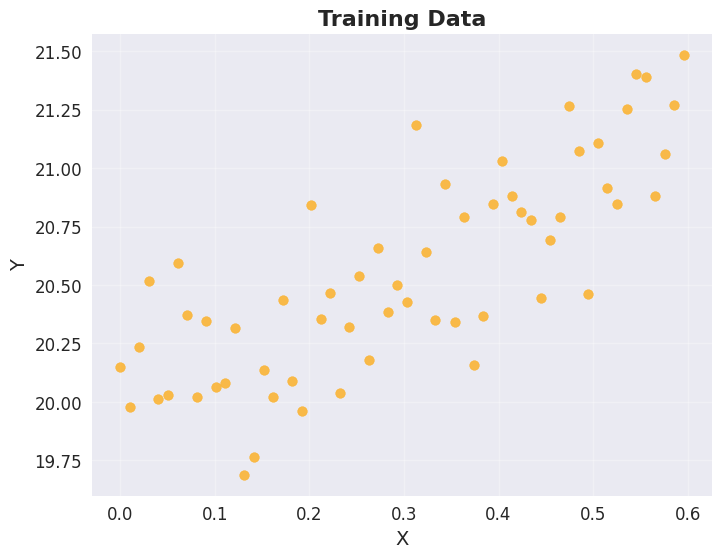

In [9]:
# завантажую
training_data = reading_file(r'./lab_1_train.csv')
x_training, y_training = zip(*training_data)

# Встановлюю стиль плоту, створюю об’єкти фігури та осі
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_training, y_training, c='orange', alpha=0.7)

# Додаю назву та підписую осі
ax.set_title('Training Data', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

# Додаю лінії сітки та налаштовую позначки
ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

# Показую дані
plt.show()

In [ ]:
#### Обрахуємо регресію, функцію втрат та сам градієнтний спуск

In [10]:
def linear_regression_intercept_slope(intercept, slope, x):
    """Обчислюю значення лінійної регресії"""
    return intercept + slope * x

def calculate_mean_squared_error(predicted, actual):
    """Обчислюю середню квадратичну похибку між прогнозованими та фактичними значеннями"""
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)

def calculate_derivatives(y, predicted_y, x):
    """Обчисліть похідні функції втрат відносно перетину та нахилу"""
    diff_y = y - predicted_y
    derivative_intercept = - (2 / len(diff_y)) * np.sum(diff_y)
    derivative_slope = - (2 / len(diff_y)) * np.sum(np.multiply(diff_y, x))
    return derivative_intercept, derivative_slope

def train_linear_regression_model(training_data, tolerance=0.000001, learning_rate=0.01):
    """
    Навчання моделі лінійної регресії за допомогою градієнтного спуску.
    
    Аргументи:
        training_data (список): дані навчання у вигляді списку рядків. Кожен рядок має бути списком із двох значень: вхідного x і вихідного y
        tolerance (float): Навчання припиняється, коли зміна втрат між епохами є меншою за допуск
        learning_rate (float): Швидкість навчання, яка використовується для оновлення перетину та нахилу
        
    Повернення:
        dict: словник, що містить остаточні значення перехоплення та нахилу
    """
    # Ініціалізую перетин та нахил випадковими значеннями
    intercept, slope = np.random.normal(), np.random.normal()
    
    # Витягую значення x і y із навчальних даних
    x = np.array(training_data)[:, 0].astype(float)
    y = np.array(training_data)[:, 1].astype(float)

    # Обчислюю початкові прогнозовані значення та втрати
    predicted_y = linear_regression_intercept_slope(intercept, slope, x)
    loss = calculate_mean_squared_error(predicted_y, y)

    # Ініціалізую дельти та номера епох
    delta = 100
    epoch_number = 0

    # Навчаю, доки не буде досягнуто критеріїв
    while tolerance < delta:
        
        # Обчислюю похідні функції втрат відносно перетину та нахилу
        derivative_intercept, derivative_slope = calculate_derivatives(y, predicted_y, x)

        # Оновлюю відрізок і нахил, використовуючи швидкість навчання та обчислені похідні
        intercept -= learning_rate * derivative_intercept
        slope -= learning_rate * derivative_slope

        # Обчислюю нові прогнозовані значення y і втрати
        predicted_y = linear_regression_intercept_slope(intercept, slope, x)
        current_loss = calculate_mean_squared_error(predicted_y, y)

        # Обчислюю зміну втрат щодо попередньої епохи
        delta, loss, epoch_number = loss - current_loss, current_loss, epoch_number + 1

        # Виводжу поточний номер епохи, втрати, значення перетину та нахилу
        print(f'Epoch {epoch_number}, Loss: {loss:.4f}, Intercept: {intercept:.4f}, Slope: {slope:.4f}')

    # Повертаю кінцеві значення перетину та нахилу
    return {"intercept": intercept, "slope": slope}


In [11]:
#### Тренуємо модель та повертаємо значення

In [12]:
values = train_linear_regression_model(training_data)

Epoch 1, Loss: 467.7108, Intercept: -0.7202, Slope: -1.1685
Epoch 2, Loss: 447.5303, Intercept: -0.2878, Slope: -1.0377
Epoch 3, Loss: 428.2211, Intercept: 0.1351, Slope: -0.9098
Epoch 4, Loss: 409.7456, Intercept: 0.5488, Slope: -0.7848
Epoch 5, Loss: 392.0678, Intercept: 0.9535, Slope: -0.6625
Epoch 6, Loss: 375.1533, Intercept: 1.3494, Slope: -0.5429
Epoch 7, Loss: 358.9691, Intercept: 1.7366, Slope: -0.4260
Epoch 8, Loss: 343.4837, Intercept: 2.1154, Slope: -0.3117
Epoch 9, Loss: 328.6669, Intercept: 2.4860, Slope: -0.1998
Epoch 10, Loss: 314.4899, Intercept: 2.8484, Slope: -0.0905
Epoch 11, Loss: 300.9250, Intercept: 3.2030, Slope: 0.0164
Epoch 12, Loss: 287.9457, Intercept: 3.5498, Slope: 0.1210
Epoch 13, Loss: 275.5269, Intercept: 3.8891, Slope: 0.2232
Epoch 14, Loss: 263.6443, Intercept: 4.2210, Slope: 0.3232
Epoch 15, Loss: 252.2747, Intercept: 4.5456, Slope: 0.4209
Epoch 16, Loss: 241.3960, Intercept: 4.8632, Slope: 0.5165
Epoch 17, Loss: 230.9871, Intercept: 5.1738, Slope: 0

In [13]:
#### Завантажимо та виведемо тестові дані на екран

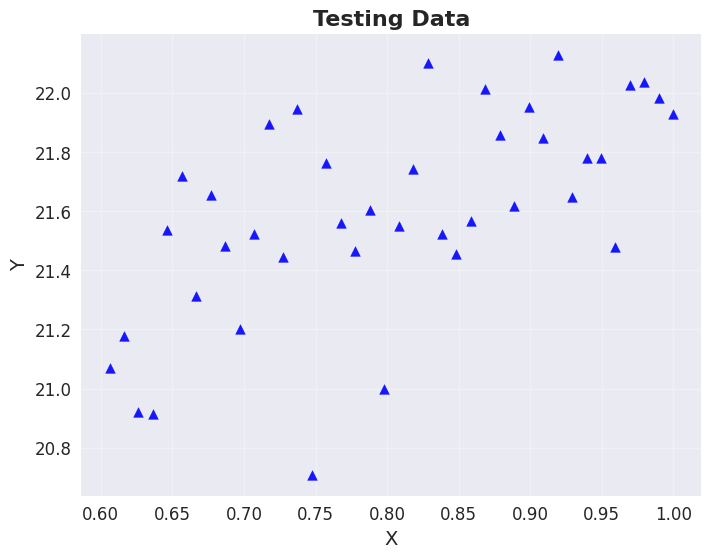

In [15]:
testing_data = reading_file(r'./lab_1_test.csv')
x_testing, y_testing = zip(*testing_data)

# Встановлюю стиль плоту, створюю об’єкти фігури та осі
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_testing, y_testing, c='blue', alpha=0.9, marker='^')

# Додаю назву та підписую осі
ax.set_title('Testing Data', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

# Додаю лінії сітки та налаштовую позначки
ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

# Показую дані
plt.show()

In [16]:
#### Виведемо отримані результати

In [ ]:
# Встановлюю стиль плоту, створюю об’єкти фігури та осі
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8,6))

# Додаю точки тренувальних даних на графік як сині трикутники
ax.scatter(x_training, y_training, c='orange', alpha=1, marker='o')

# Додаю точки тестувальних даних на графік як червоні кружечки
ax.scatter(x_testing, y_testing, c='blue', alpha=1, marker='^')

# Додаю лінію регресії
ax.plot([0, 1], 
    [
        linear_regression_intercept_slope(values["intercept"], values["slope"], 0), # y коли x=0
        linear_regression_intercept_slope(values["intercept"], values["slope"], 1) # y коли x=1
    ], c='black', linestyle='-', linewidth=1)

# Додаю назву та підписую осі
ax.set_title('Linear Regression', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

# Додаю лінії сітки та налаштовую позначки
ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

#Показую дані
plt.show()